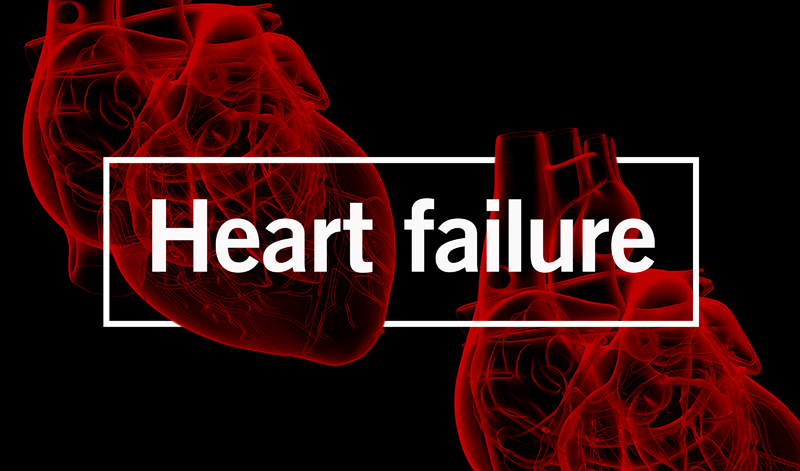

<center><h1 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana" >📜 Introduction</h1></center>
<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.</p>

<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">What we will do, we will examine these features well, and we will eliminate the situations that will adversely affect our model.Then, we will try to make predictions on the 6 models mentioned below and compare their results. </p>
    

<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana">📋 Content :</h2>

<ul>
    <li style = "color:darkgray;font-size:15px"> <a href = "#1" style = "color:black;font-weight:bold"> Load and Check Data </a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#2" style = "color:black;font-weight:bold"> Variable Description </a> </li>   
    <li style = "color:darkgray;font-size:15px"> <a href = "#3" style = "color:black;font-weight:bold"> Univariate Variable Analysis </a> <ul> <li style = "color:lightgray"><a href = "#4" style = "color:black;font-weight:500"> Numerical Variable  </a></li> <li style = "color:lightgray"><a href = "#5" style = "color:black;font-weight:500"> Categorical Variable </a></li> </ul>            
    <li style = "color:darkgray;font-size:15px"> <a href = "#6" style = "color:black;font-weight:bold">  Exploratory Data Analysis (EDA)  </a> </li>
            <li style = "color:darkgray;font-size:15px"> <a href = "#7" style = "color:black;font-weight:bold"> Outlier Detection </a> </li>
        <li style = "color:darkgray;font-size:15px"> <a href = "#8" style = "color:black;font-weight:bold"> Feature Engineering </a> <ul> <li style = "color:lightgray"><a href = "#9" style = "color:black;font-weight:500"> What is skewness ?  </a> </ul>
            <li style = "color:darkgray;font-size:15px"> <a href = "#10" style = "color:black;font-weight:bold"> Modeling   </a> <ul> <li style = "color:lightgray"><a href = "#11" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px">1️⃣ XGBoost Model </a></li> <li style = "color:lightgray"><a href = "#12" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px"> 2️⃣ RandomForest Model </a></li> <li style = "color:lightgray"><a href = "#13" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px">3️⃣ Logistic Regression Model </a></li> <li style = "color:lightgray"><a href = "#14" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px"> 4️⃣ DecisionTree Model </a></li> <li style = "color:lightgray"><a href = "#15" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px"> 5️⃣ SVM Model </a></li> <li style = "color:lightgray"><a href = "#16" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px">6️⃣ CatBoost Model </a></li> </ul>
    <li style = "color:darkgray;font-size:15px"> <a href = "#17" style = "color:black;font-weight:bold"> Model Result </a> </ul> 



<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana" > 📖 Import Library </h2>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

from scipy import stats
from scipy.stats import norm, skew, boxcox
from collections import Counter

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, plot_confusion_matrix, auc
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

#XGBOOST
from xgboost import XGBClassifier

#warning
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


<a id = "1"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> ✔️ Load and Check Data </h2>

In [2]:
data = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [3]:
#The Columns
print("Data Columns --> ",data.columns)

Data Columns -->  Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
desc = data.describe()
desc

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
print(data.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


<ul>
    <li style = "color:red"> <p style = "color:black;font-weight:bold"> we checked the columns of the data. No null data. </p>  </li>
</ul>

<a id = "2"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 📝 Variable Description </h2>

<ol>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> age : </strong> the age of the person with heart failure </p> </li>  
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> anaemia : </strong> Decrease of red blood cells or hemoglobin (boolean) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> creatinine_phosphokinase : </strong> Level of the CPK enzyme in the blood (mcg/L) </p> </li>  
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> diabetes : </strong> If the patient has diabetes (boolean) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> ejection_fraction : </strong> Percentage of blood leaving the heart at each contraction (percentage) </p> </li>  
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> high_blood_pressure  : </strong> If the patient has hypertension (boolean) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> platelets : </strong> Platelets in the blood (kiloplatelets/mL) </p> </li>  
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> serum_creatinine : </strong> Level of serum creatinine in the blood (mg/dL) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> serum_sodium : </strong>Level of serum sodium in the blood (mEq/L) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> sex : </strong> Woman or man (binary) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> smoking : </strong> If the patient smokes or not (boolean) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> time : </strong> Follow-up period (days) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> DEATH_EVENT : </strong> If the patient deceased during the follow-up period (boolean) </p> </li>
</ol>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ul>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> float64 : </strong> age, platelets, serum_creatinine</p> </li> 
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> int64 : </strong> We see that all our remaining columns are int.</p> </li>
</ul>

<a id = "3"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> ✍️ Univariate Variable Analysis </h2>

<ul>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We see that our data consists of float and int columns. But there are some striking columns here. We see that these are categorical. Let's examine these columns.  </strong>  </p>
        <ul>
            <li style = "color:gray"> <p style = "color:black"> Numerical Variable </p> </li>
            <li style = "color:gray"> <p style = "color:black"> Categorical Variable </p> </li>
        </ul>
    </li> 
</ul>

<a id = "4"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 🔢 Numerical Variable </h3>

In [8]:
def plot_hist(variable):
    print("min {} : {} ".format(variable, min(data[variable])))
    print("max {} : {}".format(variable, max(data[variable])))
    
    plt.figure(figsize=(9,3))
    plt.hist(data[variable], color="darkred")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(variable))
    plt.show()

min age : 40.0 
max age : 95.0


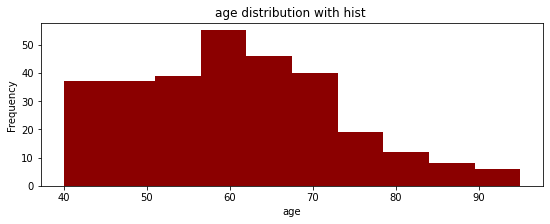

min creatinine_phosphokinase : 23 
max creatinine_phosphokinase : 7861


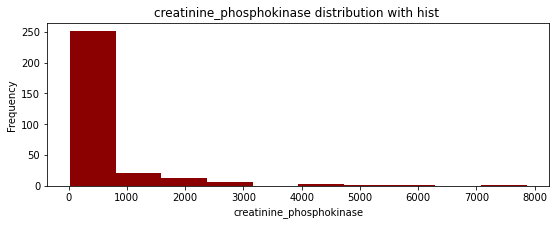

min ejection_fraction : 14 
max ejection_fraction : 80


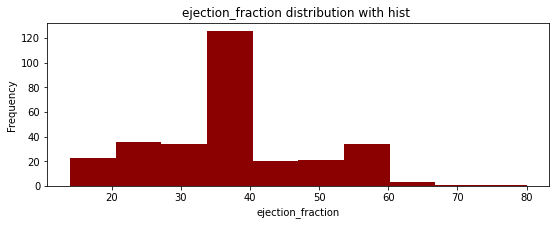

min platelets : 25100.0 
max platelets : 850000.0


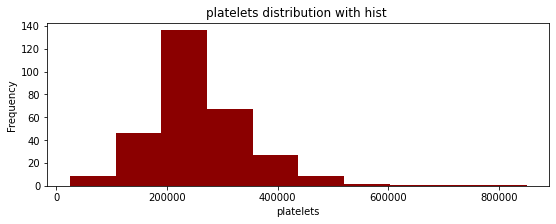

min serum_creatinine : 0.5 
max serum_creatinine : 9.4


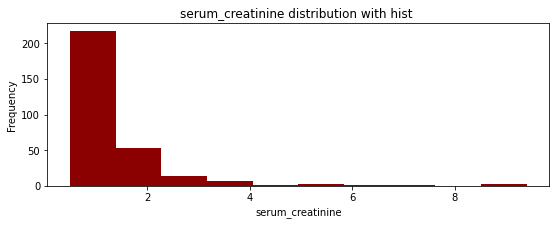

min serum_sodium : 113 
max serum_sodium : 148


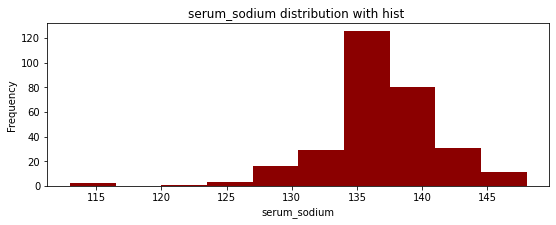

min time : 4 
max time : 285


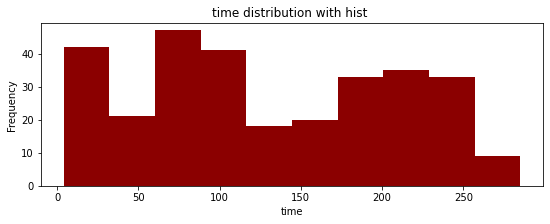

In [9]:
numericVar = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for n in numericVar:
    plot_hist(n)

<a id = "5"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 💹 Categorical Variable </h3>

In [10]:
def bar_plot(variable):
    
    # get feature
    var = data[variable]
    #count number of categorical variable (value/sample)
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue,color = "lightgreen", edgecolor = "black", linewidth = 2)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

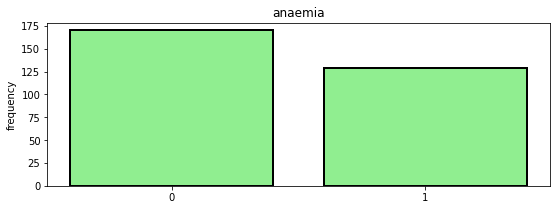

anaemia: 
 0    170
1    129
Name: anaemia, dtype: int64


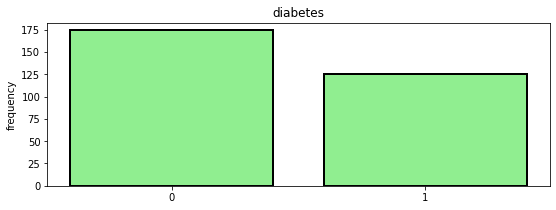

diabetes: 
 0    174
1    125
Name: diabetes, dtype: int64


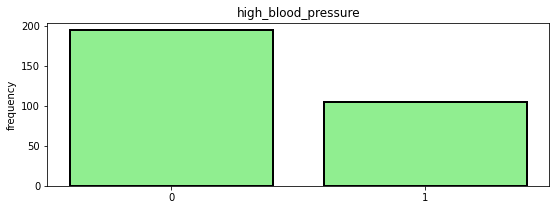

high_blood_pressure: 
 0    194
1    105
Name: high_blood_pressure, dtype: int64


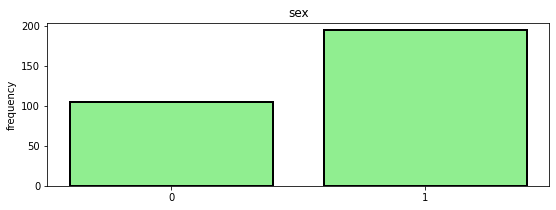

sex: 
 1    194
0    105
Name: sex, dtype: int64


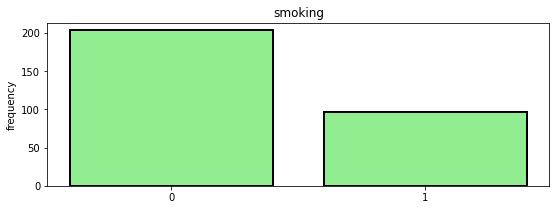

smoking: 
 0    203
1     96
Name: smoking, dtype: int64


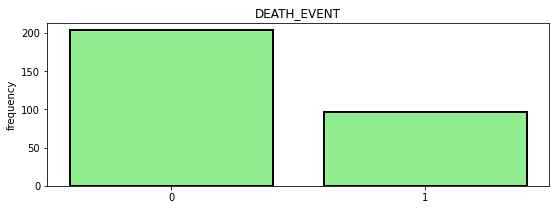

DEATH_EVENT: 
 0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [11]:
category = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
for c in category:
    bar_plot(c)

<a id = "6"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 🔍 Exploratory Data Analysis (EDA) </h2>

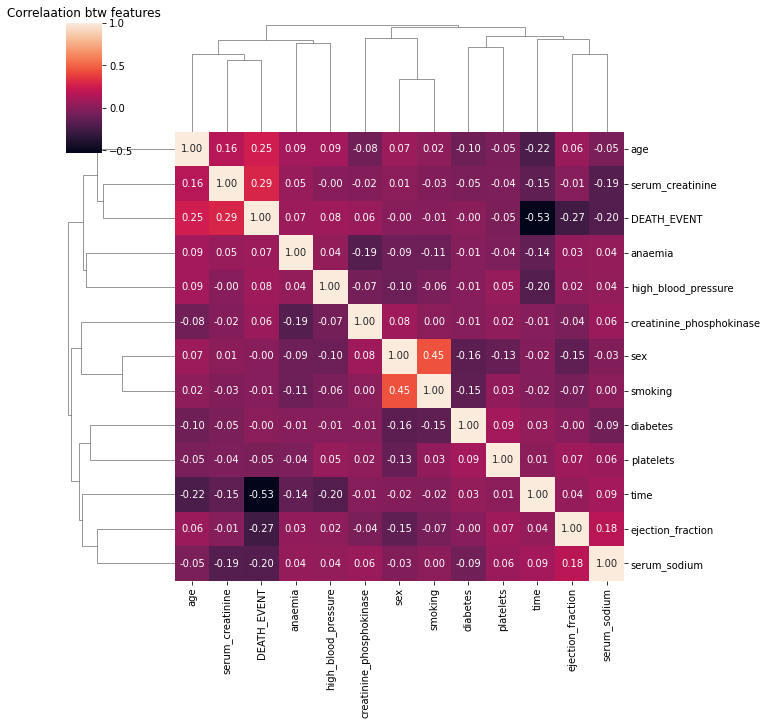

In [12]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlaation btw features")
plt.show()

<ul>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We draw the relationship matrix and examine the relationships between properties..  </strong>  </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> If the relation between properties is 1 it means that it is true and -1 means it is inversely proportional.  </strong>  </p> </li> 
</ul>

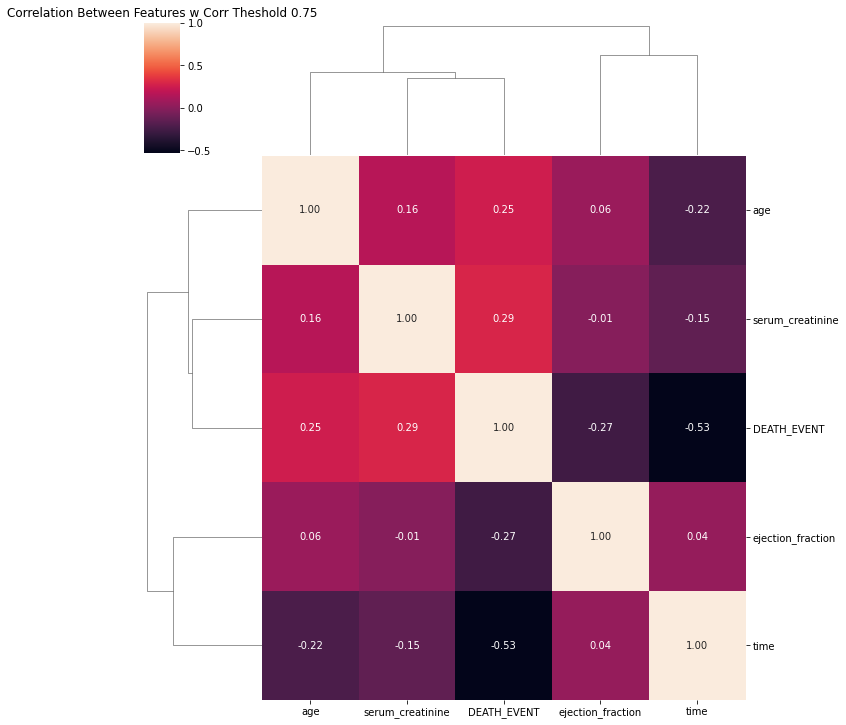

In [13]:
threshold = 0.2 
filtre = np.abs(corr_matrix["DEATH_EVENT"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

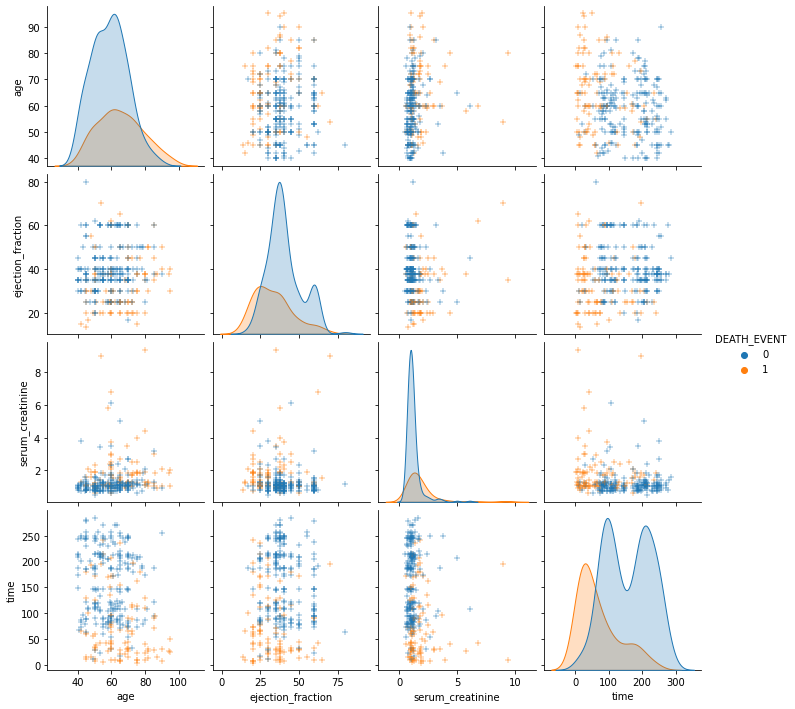

In [14]:
#pair plot
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+", hue = "DEATH_EVENT")
plt.show()

<a id = "7"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 🕵️‍ Outlier Detection </h2>

In [15]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1) 
    
    return multiple_outliers

In [16]:
data.loc[detect_outliers(data,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
data = data.drop(detect_outliers(data,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]),axis = 0).reset_index(drop=True)

<ul>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We reduce our outliers from our data.  </strong>  </p> </li> 
</ul>

<a id = "8"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 💻 Feature Engineering </h2>

<a id = "9"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> ❓ What is skewness ? </h3>

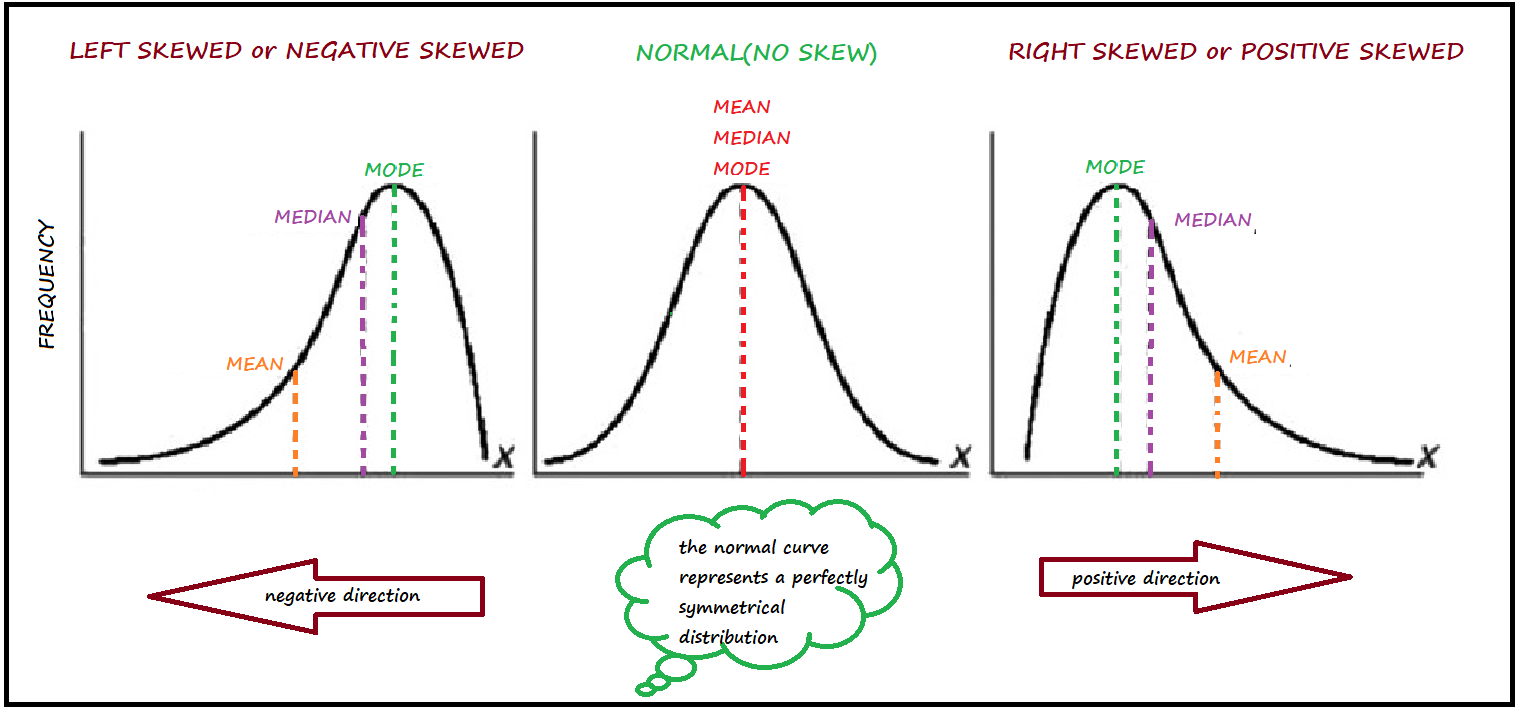

<p style = "color:black;font-weight:500" > <strong> Skewness : </strong> Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. In simple terms, it is how much a variable deviates from the normal distribution.  </p>

<p style = "color:black;font-weight:700" >There are two types.</p>

<ul> 
    <li style = "color:darkred;font-weight:500" >Right Skewed or Positive Skewed </li>
    <li style = "color:darkred;font-weight:500" >Left Skewed or Negative Skewed</li>
</ul>


<p style = "color:black;font-weight:500" >Right Skewed or Positive Skewed --> The distribution has a rightward tail with respect to the normal distribution.</p>

<p style = "color:black;font-weight:500" >Left Skewed or Negative Skewed --> The distribution has a tail to the left relative to the normal distribution.</p>

<h3 style = "color:gray" >
Why is it important?</h3>
<p style = "color:black;font-weight:500" >The model has difficulty in estimating the correct value at other points while focusing on the dense point while predicting on data that does not show a normal distribution.</p>

<p style = "color:black;font-weight:500" >What do we do, we will look at our skewness values. If it is greater than 1, there is positive skewness, if it is less than -1, there is negative skewness.</p>

<h5>Let's start.</h5>

In [18]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
creatinine_phosphokinase,4.827396
serum_creatinine,4.605615
platelets,1.429547
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
ejection_fraction,0.546146
age,0.413840
diabetes,0.358569
anaemia,0.286636


<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> As we said in the definition above, we find our skewness values. </strong> </p> </li>
</ul>

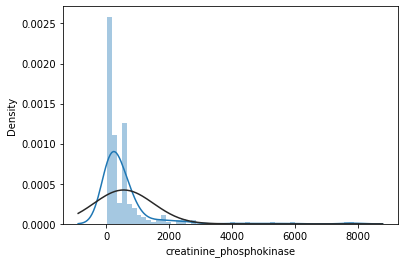

mu creatinine_phosphokinase : 553.121107266436, sigma creatinine_phosphokinase : 943.411428667967



In [19]:
# creatinine_phosphokinase
sns.distplot(data["creatinine_phosphokinase"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["creatinine_phosphokinase"])
print("mu {} : {}, sigma {} : {}".format("creatinine_phosphokinase", mu, "creatinine_phosphokinase", sigma))
print()

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We also see the skewness of the value of creatine phosphokinase on the graph.</strong> </p> </li>
        <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We fix this disorder by using boxcox. </strong> </p> </li>
</ul>

In [20]:
data["creatinine_phosphokinase"], lam = boxcox(data["creatinine_phosphokinase"])

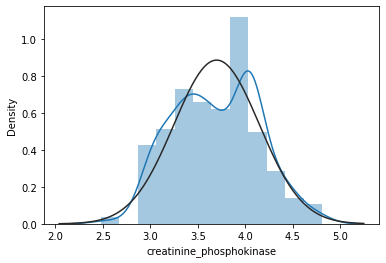

mu creatinine_phosphokinase : 3.698843171315633, sigma creatinine_phosphokinase : 0.4504255141000855



In [21]:
# creatinine_phosphokinase
sns.distplot(data["creatinine_phosphokinase"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["creatinine_phosphokinase"])
print("mu {} : {}, sigma {} : {}".format("creatinine_phosphokinase", mu, "creatinine_phosphokinase", sigma))
print()

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We can take a look at the improvement by examining the graph again. </strong> </p> </li>
</ul>

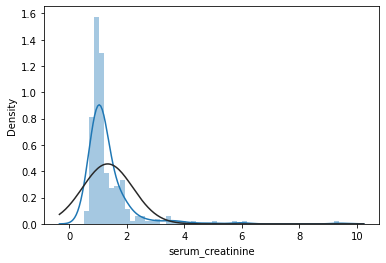

mu serum_creatinine : 1.333114186851211, sigma serum_creatinine : 0.8748528244624999



In [22]:
# serum_creatinine
sns.distplot(data["serum_creatinine"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["serum_creatinine"])
print("mu {} : {}, sigma {} : {}".format("serum_creatinine", mu, "serum_creatinine", sigma))
print()

In [23]:
data["serum_creatinine"], lam_serum_creatine = boxcox(data["serum_creatinine"])

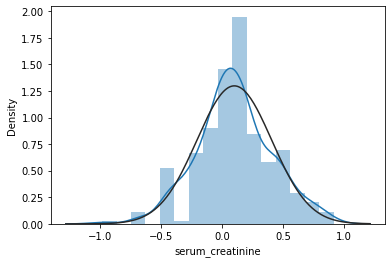

mu serum_creatinine : 0.10109147159013519, sigma serum_creatinine : 0.3073176761803753



In [24]:
# serum_creatinine
sns.distplot(data["serum_creatinine"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["serum_creatinine"])
print("mu {} : {}, sigma {} : {}".format("serum_creatinine", mu, "serum_creatinine", sigma))
print()

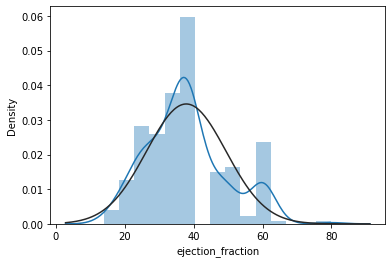

mu ejection_fraction : 37.8719723183391, sigma smejection_fractionoking : 11.526149444782293



In [25]:
# ejection_fraction
sns.distplot(data["ejection_fraction"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["ejection_fraction"])
print("mu {} : {}, sigma {} : {}".format("ejection_fraction", mu, "smejection_fractionoking", sigma))
print()

In [26]:
data["ejection_fraction"], lam_serum_creatine = boxcox(data["ejection_fraction"])

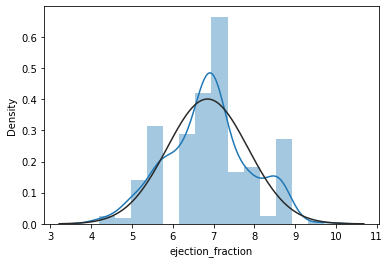

mu ejection_fraction : 6.8528622136803135, sigma smejection_fractionoking : 0.9951607969085129



In [27]:
# ejection_fraction
sns.distplot(data["ejection_fraction"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["ejection_fraction"])
print("mu {} : {}, sigma {} : {}".format("ejection_fraction", mu, "smejection_fractionoking", sigma))
print()

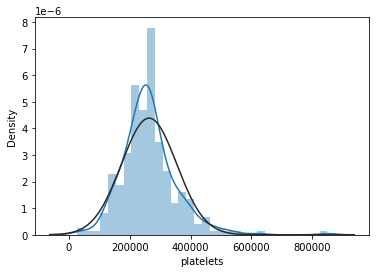

mu platelets : 263597.55266435986, sigma platelets : 90929.19587502987



In [28]:
# platelets
sns.distplot(data["platelets"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["platelets"])
print("mu {} : {}, sigma {} : {}".format("platelets", mu, "platelets", sigma))
print()

In [29]:
data["platelets"], lam_serum_creatine = boxcox(data["platelets"])

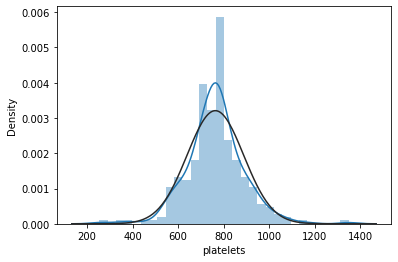

mu platelets : 763.3363077948457, sigma platelets : 124.37245302525076



In [30]:
# platelets
sns.distplot(data["platelets"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["platelets"])
print("mu {} : {}, sigma {} : {}".format("platelets", mu, "platelets", sigma))
print()

In [31]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness_new = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness_new

,skewed
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
age,0.413840
diabetes,0.358569
anaemia,0.286636
platelets,0.153154
time,0.125442
creatinine_phosphokinase,0.038332
serum_creatinine,-0.005096


<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> You can take a look at the change by comparing it with the skew chart above. </strong> </p> </li>
</ul>

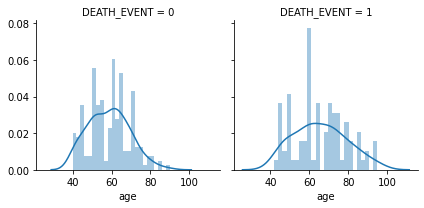

In [32]:
#AGE
g = sns.FacetGrid(data, col = "DEATH_EVENT")
g.map(sns.distplot, "age", bins = 25)
plt.show()

<a id = "10"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 📁 Modeling </h2>

<p  style = "color:black;font-weight:500" > We will carry out our trainings using the models you see below. Finally, we will compare their achievements. </p>
<ul>
    <li style = "color:darkred;font-weight:bold" > XGBoost Model</li>
     <li style = "color:darkred;font-weight:bold" >RandomForest Model</li>
     <li style = "color:darkred;font-weight:bold" >Logistic Regression Model</li>
     <li style = "color:darkred;font-weight:bold" >DesisionTree Model</li>
     <li style = "color:darkred;font-weight:bold" >SVM Model</li>
     <li style = "color:darkred;font-weight:bold" >CatBoost Model</li>
</ul>

In [33]:
X = data.drop("DEATH_EVENT", axis = 1)
y = data.DEATH_EVENT

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We determine x and y. </strong> </p> </li>
</ul>

In [34]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,4.025638,0,5.073540,1,776.442477,0.478943,130,1,0,4
1,55.0,0,4.812379,0,6.966172,0,774.155955,0.091073,136,1,0,6
2,65.0,0,3.457055,0,5.073540,0,614.694301,0.231885,129,1,1,7
3,50.0,1,3.328958,0,5.073540,0,695.287977,0.478943,137,1,0,7
4,90.0,1,2.889637,0,7.135176,1,685.786862,0.530416,132,1,1,8


In [35]:
print("Before Smote")
y.value_counts()

Before Smote


0    198
1     91
Name: DEATH_EVENT, dtype: int64

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We can't call our data too irregular, but we'd better get rid of this disorder anyway. </strong> </p> </li>
</ul>

In [36]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [37]:
print("After Smote")
y_sm.value_counts()

After Smote


0    198
1    198
Name: DEATH_EVENT, dtype: int64

<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 📊 Train - Test Split </h3>

In [38]:
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size = test_size, random_state = 42)

In [39]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (316, 12), len 316.
X_test shape (80, 12), len 80.
Y_train shape (316,), len 316.
Y_test shape (80,), len 80.


In [40]:
# list to keep our results
result_acc = []

<a id = "11"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 1️⃣ XGBoost model </h3>

In [41]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, Y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, Y_test)
acc_xgb = accuracy_score(Y_test, y_pred_xgb)
result_acc.append(acc_xgb)
print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)
print("XGBoost Model Cm : ",cm_xgb)

[14:13:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RESULT
XGBoost Model Acc :  0.9625
XGBoost Model Cm :  [[39  3]
 [ 0 38]]


<a id = "12"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 2️⃣ Random Forest Model</h3>

<ul>
        <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> First of all, we will find our important features for that model and we will use them. </strong> </p> </li>
            <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> we will do this for all other models too. </strong> </p> </li>
</ul>

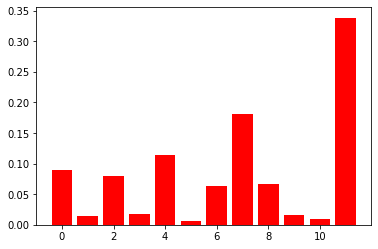

In [42]:
model_rnd = RandomForestClassifier()
model_rnd.fit(X_train, Y_train)
importance = model_rnd.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance, color = "red")
plt.show()

In [43]:
x_train_random_forest = X_train[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","time"]]
x_test_random_forest = X_test[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","time"]]

In [44]:
random_forest_model = RandomForestClassifier(max_depth=7, random_state=25)
random_forest_model.fit(x_train_random_forest, Y_train)
y_pred_random_forest = random_forest_model.predict(x_test_random_forest)
cm_random_forest = confusion_matrix(y_pred_random_forest, Y_test)
acc_random_forest = accuracy_score(Y_test, y_pred_random_forest)
result_acc.append(acc_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)
print("Random Forest Model Cm : ",cm_random_forest)

RESULT
Random Forest Model Acc :  0.975
Random Forest Model Cm :  [[38  1]
 [ 1 40]]


<a id = "13"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 3️⃣ Logistic Regression Model</h3>

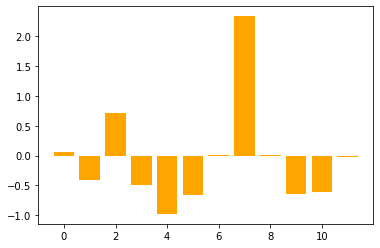

In [45]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, Y_train)
importance = model_log_reg.coef_[0]

plt.bar([x for x in range(len(importance))], importance, color = "orange")
plt.show()

In [46]:
x_train_log_reg = X_train[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]
x_test_log_reg = X_test[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]

In [47]:
log_reg = LogisticRegression()
log_reg.fit(x_train_log_reg, Y_train)
y_pred_log = log_reg.predict(x_test_log_reg)
cm_log_reg = confusion_matrix(y_pred_log, Y_test)
acc_log_reg = accuracy_score(Y_test, y_pred_log)
result_acc.append(acc_log_reg)
print("RESULT")
print("Logistic Regression Model Acc : ",acc_log_reg)
print("Logistic Regression Model Cm : ",cm_log_reg)

RESULT
Logistic Regression Model Acc :  0.7375
Logistic Regression Model Cm :  [[30 12]
 [ 9 29]]


<a id = "14"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 4️⃣ DecisionTree Model</h3>

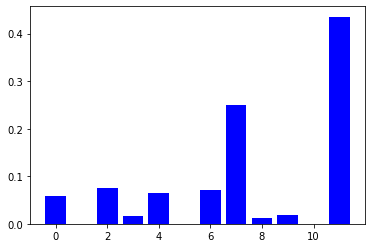

In [48]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, Y_train)
importance = model_decision_tree.feature_importances_

plt.bar([x for x in range(len(importance))], importance, color = "blue")
plt.show()

In [49]:
x_train_dec = X_train[["creatinine_phosphokinase","ejection_fraction","time"]]
x_test_dec = X_test[["creatinine_phosphokinase","ejection_fraction","time"]]

In [50]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20)}

decision_tree = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree, param_grid=dt_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(x_train_dec,Y_train)

y_pred_decision_tree = clf.predict(x_test_dec)
cm_y_pred_decision_tree = confusion_matrix(y_pred_decision_tree, Y_test)
acc_y_pred_decision_tree = accuracy_score(Y_test, y_pred_decision_tree)
result_acc.append(acc_y_pred_decision_tree)
print("RESULT")
print("Decision Tree Model Acc : ",acc_y_pred_decision_tree)
print("Decision Tree Model Cm : ",cm_y_pred_decision_tree)

Fitting 10 folds for each of 475 candidates, totalling 4750 fits
RESULT
Decision Tree Model Acc :  0.8875
Decision Tree Model Cm :  [[34  4]
 [ 5 37]]


<a id = "15"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 5️⃣ SVM Model</h3>

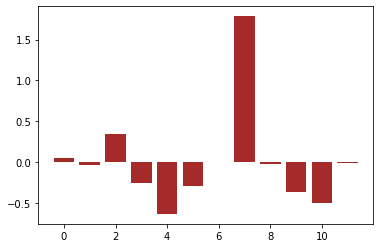

In [51]:
model_svm = SVC(kernel="linear")
model_svm.fit(X_train, Y_train)
importance = model_svm.coef_[0]

plt.bar([x for x in range(len(importance))], importance, color = "brown")
plt.show()

In [52]:
x_train_svm = X_train[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]
x_test_svm = X_test[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]

In [53]:
svm = SVC()
svm.fit(x_train_svm, Y_train)
y_pred_svm = svm.predict(x_test_svm)
cm_svm = confusion_matrix(y_pred_svm, Y_test)
acc_svm = accuracy_score(Y_test, y_pred_svm)
result_acc.append(acc_svm)
print("RESULT")
print("SVM Model Acc : ",acc_svm)
print("SVM Model Cm : ",cm_svm)

RESULT
SVM Model Acc :  0.75
SVM Model Cm :  [[30 11]
 [ 9 30]]


<a id = "16"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 6️⃣ CatBoost  Model</h3>

In [54]:
best_params = {'bagging_temperature': 0.8,
               'depth': 5,
               'iterations': 500,
               'l2_leaf_reg': 30,
               'learning_rate': 0.05,
               'random_strength': 0.8}

model_cat_boost = CatBoostClassifier(
        **best_params,
        loss_function='Logloss',
        eval_metric='Accuracy',         
        nan_mode='Min',
        verbose=False
    )

model_cat_boost.fit(
        X_train, Y_train,
        verbose_eval=100, 
        early_stopping_rounds=50,
        eval_set=(X_test, Y_test),
        use_best_model=False,
        plot=True
)

y_pred_cat_boost = model_cat_boost.predict(X_test)

cm_cat_boost = confusion_matrix(y_pred_cat_boost, Y_test)
acc_cat_boost = accuracy_score(Y_test, y_pred_cat_boost)
result_acc.append(acc_cat_boost)
print("RESULT")
print("Cat Boost Model Acc : ",acc_cat_boost)
print("Cat Boost Model Cm : ",cm_cat_boost)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8734177	test: 0.8875000	best: 0.8875000 (0)	total: 61.2ms	remaining: 30.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.95
bestIteration = 26

RESULT
Cat Boost Model Acc :  0.9375
Cat Boost Model Cm :  [[36  2]
 [ 3 39]]


<a id = "17"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 📈 Model Result</h2>

In [55]:
results = pd.DataFrame({"Model Result":result_acc, 
                        "Models":["XGBoost",
                                  "RandomForest",
                                  "LogisticRegression",
                                  "DecisionTree", 
                                  "SVM",
                                  "CatBoost"]})

In [56]:
results

,Model Result,Models
0,0.9625,XGBoost
1,0.9750,RandomForest
2,0.7375,LogisticRegression
3,0.8875,DecisionTree
4,0.7500,SVM
5,0.9375,CatBoost


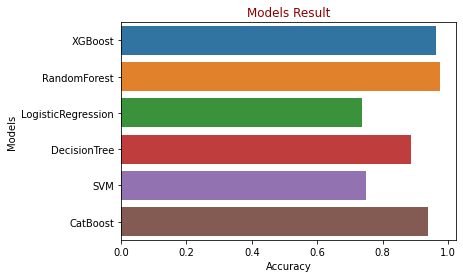

In [57]:
g = sns.barplot("Model Result", "Models", data = results)
g.set_xlabel("Accuracy")
g.set_title("Models Result", color = "darkred")
plt.show()

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> yes, we have come to the end. As you can see, our biggest success with random forest is 97.5 </strong> </p> </li>
</ul>